<a href="https://colab.research.google.com/github/nyee88/Brilliant/blob/main/OCSR-CLIP/OCSR-CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Generate a tiny toy dataset of molecule image + graph pairs from SMILES using RDKit

# Install RDKit (Colab)
!pip install rdkit -q

import os, json
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 1) A tiny hard-coded SMILES list (replace these with whatever you want)
smiles_list = {
    "benzene": "c1ccccc1",
    "thiophene": "c1ccsc1",
    "pyridine": "c1ccncc1",
    "aniline": "Nc1ccccc1",
    "benzoic_acid": "OC(=O)c1ccccc1",
    "furan": "c1ccoc1",
    "DPP_core": "O=C1C(C2=CN1)=CNC2=O",
    "ethyl_acetate": "CCOC(=O)C",
    "acetic_acid": "CC(=O)O",
    "toluene": "Cc1ccccc1",
}

# 2) Make output folder
out_dir = "clip_molecule_pairs"
os.makedirs(out_dir, exist_ok=True)

# 3) Helper to build a simple graph representation
def mol_to_graph_dict(mol):
    atoms = []
    for atom in mol.GetAtoms():
        atoms.append({
            "idx": atom.GetIdx(),
            "symbol": atom.GetSymbol(),
            "atomic_num": atom.GetAtomicNum(),
            "degree": atom.GetDegree(),
            "is_aromatic": atom.GetIsAromatic(),
            "is_in_ring": atom.IsInRing(),
            "formal_charge": atom.GetFormalCharge(),
        })

    bonds = []
    for bond in mol.GetBonds():
        bonds.append({
            "begin": bond.GetBeginAtomIdx(),
            "end": bond.GetEndAtomIdx(),
            "bond_type": str(bond.GetBondType()),  # e.g. SINGLE, DOUBLE, AROMATIC
            "is_in_ring": bond.IsInRing(),
        })

    # adjacency matrix for convenience
    adj = Chem.GetAdjacencyMatrix(mol).tolist()

    return {
        "atoms": atoms,
        "bonds": bonds,
        "adjacency": adj,
    }

# 4) Loop over SMILES, sanitize, draw PNG, save graph as JSON
for name, smi in smiles_list.items():
    print(f"Processing {name}: {smi}")
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print(f"  [!] Failed to parse SMILES for {name}, skipping.")
        continue

    try:
        Chem.SanitizeMol(mol)
    except Exception as e:
        print(f"  [!] Sanitization failed for {name}: {e}")
        continue

    # Compute 2D coordinates for nicer drawings
    AllChem.Compute2DCoords(mol)

    # 4a) Save 2D structure PNG
    png_path = os.path.join(out_dir, f"{name}.png")
    Draw.MolToFile(mol, png_path, size=(300, 300))
    print(f"  [+] Saved image to {png_path}")

    # 4b) Save graph representation as JSON
    graph = mol_to_graph_dict(mol)
    graph_path = os.path.join(out_dir, f"{name}_graph.json")
    with open(graph_path, "w") as f:
        json.dump({
            "name": name,
            "smiles": smi,
            "graph": graph,
        }, f, indent=2)
    print(f"  [+] Saved graph to {graph_path}")

print("\nDone. Check the 'clip_molecule_pairs' folder for PNGs + JSON graphs.")

Processing benzene: c1ccccc1
  [+] Saved image to clip_molecule_pairs/benzene.png
  [+] Saved graph to clip_molecule_pairs/benzene_graph.json
Processing thiophene: c1ccsc1
  [+] Saved image to clip_molecule_pairs/thiophene.png
  [+] Saved graph to clip_molecule_pairs/thiophene_graph.json
Processing pyridine: c1ccncc1
  [+] Saved image to clip_molecule_pairs/pyridine.png
  [+] Saved graph to clip_molecule_pairs/pyridine_graph.json
Processing aniline: Nc1ccccc1
  [+] Saved image to clip_molecule_pairs/aniline.png
  [+] Saved graph to clip_molecule_pairs/aniline_graph.json
Processing benzoic_acid: OC(=O)c1ccccc1
  [+] Saved image to clip_molecule_pairs/benzoic_acid.png
  [+] Saved graph to clip_molecule_pairs/benzoic_acid_graph.json
Processing furan: c1ccoc1
  [+] Saved image to clip_molecule_pairs/furan.png
  [+] Saved graph to clip_molecule_pairs/furan_graph.json
Processing DPP_core: O=C1C(C2=CN1)=CNC2=O
  [+] Saved image to clip_molecule_pairs/DPP_core.png
  [+] Saved graph to clip_mol

Files in clip_molecule_pairs
  DPP_core.png
  DPP_core_graph.json
  acetic_acid.png
  acetic_acid_graph.json
  aniline.png
  aniline_graph.json
  benzene.png
  benzene_graph.json
  benzoic_acid.png
  benzoic_acid_graph.json
  ethyl_acetate.png
  ethyl_acetate_graph.json
  furan.png
  furan_graph.json
  pyridine.png
  pyridine_graph.json
  thiophene.png
  thiophene_graph.json
  toluene.png
  toluene_graph.json

Showing image for: benzene


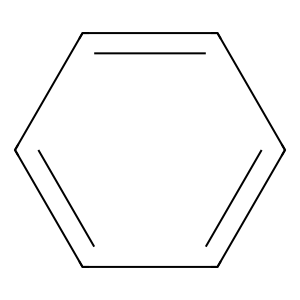


Graph JSON for: benzene
SMILES: c1ccccc1

First few atoms:
{'idx': 0, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 1, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 2, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 3, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 4, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}

First few bonds:
{'begin': 0, 'end': 1, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 1, 'end': 2, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 2, 'end': 3, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 3, 'end': 4, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 4, 'end': 5, 'bond_type': 'AROMATIC', 'is_in_ring': Tru

In [6]:
import os, json
from IPython.display import Image, display

out_dir = "clip_molecule_pairs"

# List what's in the folder
print("Files in", out_dir)
for fname in sorted(os.listdir(out_dir)):
    print(" ", fname)

# Pick one example molecule to inspect
example_name = "benzene"  # change to "DPP_core" or others if you like

png_path = os.path.join(out_dir, f"{example_name}.png")
json_path = os.path.join(out_dir, f"{example_name}_graph.json")

print(f"\nShowing image for: {example_name}")
display(Image(filename=png_path))

print(f"\nGraph JSON for: {example_name}")
with open(json_path, "r") as f:
    graph_data = json.load(f)

# Print a small, human-readable summary
print("SMILES:", graph_data["smiles"])
print("\nFirst few atoms:")
for atom in graph_data["graph"]["atoms"][:5]:
    print(atom)

print("\nFirst few bonds:")
for bond in graph_data["graph"]["bonds"][:5]:
    print(bond)
